In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Ler o arquivo CSV com as colunas na primeira linha
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

In [33]:
df = df.drop('gender', axis=1)
df = df.drop('smoking_history', axis=1)

In [34]:
# Identificar automaticamente as características e a classe
features = list(df.columns[:-1])
target = df.columns[-1]

In [35]:
features, target

(['age',
  'hypertension',
  'heart_disease',
  'bmi',
  'HbA1c_level',
  'blood_glucose_level'],
 'diabetes')

In [36]:
# Separar os dados em características (X) e rótulos (y)
X = df[features]
y = df[target]

In [37]:
# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Criar o modelo de árvore de decisão C4.5
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [39]:
# Treinar o modelo usando os dados de treinamento
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
# Testar o modelo usando os dados de teste
accuracy = clf.score(X_test, y_test)
print("Acurácia Arvore de decisão:", accuracy)

Acurácia Arvore de decisão: 0.9551


In [41]:
# Imprimir as regras da árvore de decisão
tree_rules = export_text(clf, feature_names=features)
print(tree_rules)

|--- HbA1c_level <= 6.70
|   |--- blood_glucose_level <= 210.00
|   |   |--- HbA1c_level <= 5.35
|   |   |   |--- class: 0
|   |   |--- HbA1c_level >  5.35
|   |   |   |--- age <= 46.50
|   |   |   |   |--- blood_glucose_level <= 113.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- blood_glucose_level >  113.00
|   |   |   |   |   |--- bmi <= 28.98
|   |   |   |   |   |   |--- age <= 39.50
|   |   |   |   |   |   |   |--- age <= 11.50
|   |   |   |   |   |   |   |   |--- age <= 2.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- age >  2.50
|   |   |   |   |   |   |   |   |   |--- blood_glucose_level <= 180.00
|   |   |   |   |   |   |   |   |   |   |--- HbA1c_level <= 6.55
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- HbA1c_level >  6.55
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |--- blood_g

Matriz de Confusão:
 [[26806   647]
 [  700  1847]]
Acurácia Arvore de decisão: 0.9551


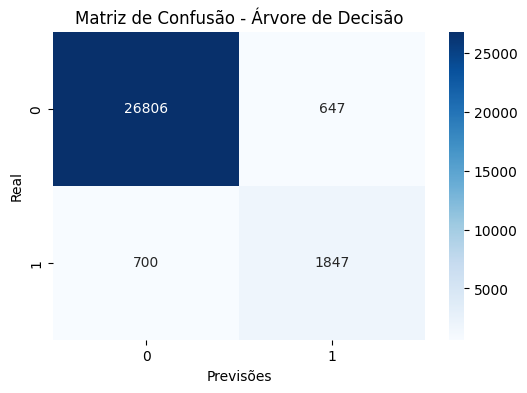

In [42]:
# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print("Matriz de Confusão:\n", cm)

# Calcular a acurácia
accuracy = clf.score(X_test, y_test)
print("Acurácia Arvore de decisão:", accuracy)

# Criar um plot da matriz de confusão usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()